
# My Personal Notebook for Linear Regression Project


### This is an import of all the libraries needed to complete the tasks below in this notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

### Here I am pulling in the CSV of the King County housing data dataset to the variable 'data'

In [2]:
data = pd.read_csv('../../../data/Original df with State Rank Dummy encoded')
data

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,State Rank_8.0,State Rank_9.0,State Rank_12.0,State Rank_26.0,State Rank_37.0,State Rank_49.0,State Rank_62.0,State Rank_73.0,State Rank_79.0,State Rank_93.0
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229,21405,993001961,7/9/2014,374950.0,3,2.25,1390,1484,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21230,21406,9274200028,2/19/2015,386950.0,3,2.50,1070,1089,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21231,21407,7708200180,7/10/2014,535000.0,5,3.25,2850,4551,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21232,21408,8691430330,8/31/2014,890000.0,5,3.25,4100,7578,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here I have changed the name of my variable from 'data' to 'df'

In [3]:
df = data

In [4]:
df = df.drop_duplicates()
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,State Rank_8.0,State Rank_9.0,State Rank_12.0,State Rank_26.0,State Rank_37.0,State Rank_49.0,State Rank_62.0,State Rank_73.0,State Rank_79.0,State Rank_93.0
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229,21405,993001961,7/9/2014,374950.0,3,2.25,1390,1484,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21230,21406,9274200028,2/19/2015,386950.0,3,2.50,1070,1089,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21231,21407,7708200180,7/10/2014,535000.0,5,3.25,2850,4551,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21232,21408,8691430330,8/31/2014,890000.0,5,3.25,4100,7578,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.date = df["date"].map(lambda x: x.split("/")[0])
df


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,State Rank_8.0,State Rank_9.0,State Rank_12.0,State Rank_26.0,State Rank_37.0,State Rank_49.0,State Rank_62.0,State Rank_73.0,State Rank_79.0,State Rank_93.0
0,0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229,21405,993001961,7,374950.0,3,2.25,1390,1484,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21230,21406,9274200028,2,386950.0,3,2.50,1070,1089,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21231,21407,7708200180,7,535000.0,5,3.25,2850,4551,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21232,21408,8691430330,8,890000.0,5,3.25,4100,7578,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['date'] = df['date'].map(lambda x: int(x))

In [7]:
df['bed_bath'] = df['bedrooms']/df['bathrooms']

In [8]:
df['bath_bed'] = df['bathrooms']/df['bedrooms']

In [9]:
df['bed_bath'] = df['bed_bath'].map(lambda x: float(x))

In [10]:
df['bath_bed'] = df['bath_bed'].map(lambda x: float(x))

In [11]:
#df.bathrooms = df['bathrooms']*df['bedrooms']

In [12]:
for i in range (0, len(df)):
    if df['date'].iloc[i] == 1:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 2:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 3:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 4:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 5:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 6:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 7:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 8:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 9:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 10:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 11:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 12:
        df['date'].iloc[i] = 4

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [14]:
df = df.fillna(0.0)

In [15]:
df.columns = df.columns.str.replace(" ", "_")

In [16]:
df.columns = df.columns.str.lower().str.replace(".0", "")

In [17]:
df = df.drop(columns='unnamed:', axis=1)

In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,state_rank_12,state_rank_26,state_rank_37,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93,bed_bath,bath_bed
0,7129300520,3,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.333333
1,6414100192,4,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.750000
2,5631500400,4,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.500000
3,2487200875,4,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.750000
4,1954400510,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229,993001961,2,374950.0,3,2.25,1390,1484,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.750000
21230,9274200028,4,386950.0,3,2.50,1070,1089,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,0.833333
21231,7708200180,2,535000.0,5,3.25,2850,4551,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.538462,0.650000
21232,8691430330,2,890000.0,5,3.25,4100,7578,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.538462,0.650000


In [19]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.700673
grade            0.667142
sqft_above       0.603899
sqft_living15    0.585329
bathrooms        0.524516
view             0.394476
bedrooms         0.307947
lat              0.306950
bath_bed         0.282036
waterfront       0.263315
floors           0.259331
bed_bath         0.249563
yr_renovated     0.119919
sqft_lot         0.088113
sqft_lot15       0.080797
yr_built         0.049736
zipcode          0.049642
condition        0.036889
date             0.034602
id               0.019255
long             0.018177
state_rank_2     0.013613
state_rank_73    0.009333
state_rank_37    0.008179
state_rank_79    0.008140
state_rank_62    0.005742
state_rank_93    0.004799
state_rank_9     0.004325
state_rank_26    0.003179
state_rank_3     0.001946
state_rank_49    0.001880
state_rank_6     0.001739
state_rank_4     0.000996
state_rank_12    0.000958
state_rank_1     0.000258
state_rank_8     0.000128
Name: price, dtype: float64

In [20]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762356
sqft_above       0.755936
sqft_living15    0.715305
price            0.667142
bathrooms        0.664452
floors           0.459307
yr_built         0.444399
bath_bed         0.407997
bed_bath         0.401224
bedrooms         0.357698
view             0.249848
long             0.198103
zipcode          0.183344
condition        0.148038
sqft_lot15       0.119359
sqft_lot         0.113365
lat              0.112618
waterfront       0.083018
yr_renovated     0.016917
state_rank_37    0.015018
state_rank_79    0.014427
state_rank_6     0.012160
date             0.011647
state_rank_93    0.011534
state_rank_9     0.010355
state_rank_1     0.010127
state_rank_26    0.009795
state_rank_8     0.009569
state_rank_12    0.008329
state_rank_73    0.006342
id               0.006309
state_rank_2     0.004233
state_rank_49    0.001616
state_rank_3     0.001315
state_rank_62    0.001270
state_rank_4     0.001259
Name: grade, dtype: float64

In [21]:
df.grade.mean()

7.656164641612508

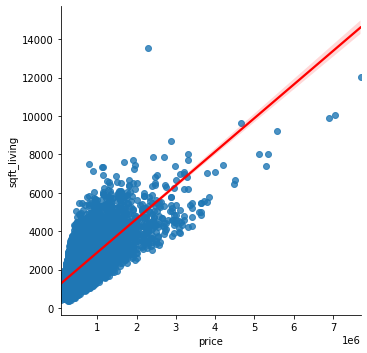

In [22]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

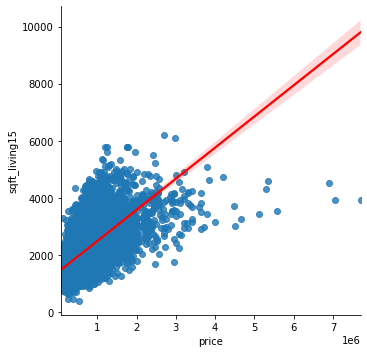

In [23]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [24]:
df.price.median()

450000.0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21234 entries, 0 to 21233
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21234 non-null  int64  
 1   date             21234 non-null  int64  
 2   price            21234 non-null  float64
 3   bedrooms         21234 non-null  int64  
 4   bathrooms        21234 non-null  float64
 5   sqft_living      21234 non-null  int64  
 6   sqft_lot         21234 non-null  int64  
 7   floors           21234 non-null  float64
 8   waterfront       21234 non-null  float64
 9   view             21234 non-null  float64
 10  condition        21234 non-null  int64  
 11  grade            21234 non-null  int64  
 12  sqft_above       21234 non-null  int64  
 13  sqft_basement    21234 non-null  object 
 14  yr_built         21234 non-null  int64  
 15  yr_renovated     21234 non-null  float64
 16  zipcode          21234 non-null  int64  
 17  lat         

In [26]:
dropped_columns = ['bath_bed', 'bed_bath', 'school_district', 'coordinates',
                  'sqft_lot', 'sqft_lot15', 'sqft_living15', 'long', 'zipcode', 'yr_renovated',
                  'yr_built', 'sqft_basement', 'grade', 'condition', 'view', 'floors',
                  'bedrooms', 'id', 'date', 'price']

In [27]:
df.waterfront.value_counts()

0.0    21089
1.0      145
Name: waterfront, dtype: int64

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(columns=dropped_columns)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1615.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:42:39   Log-Likelihood:            -2.9237e+05
No. Observations:               21234   AIC:                         5.848e+05
Df Residuals:                   21213   BIC:                         5.849e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.477e+07   5.47e+05    -63.594      0.000   -3.58e+07   -3.37e+07
bathrooms      2081.4443   3168.948      0.657      0.511   -4129.935    8292.824
sqft_living     254.4979      4.030     63.149      0.000     246.599     262.397
waterfront     8.807e+05   1.94e+04     45.421      0.000    8.43e+05    9.19e+05
sqft_above       13.8041      4.007      3.445      0.001       5.951      21.657
lat            7.305e+05   1.15e+04     63.533      0.000    7.08e+05    7.53e+05
state_rank_1   2.434e+04   1.42e+04      1.718      0.086   -3436.381    5.21e+04
state_rank_2   1.511e+04   5577.165      2.709      0.007    4176.334     2.6e+04
state_rank_3   5325.7548   9287.132      0.573      0.566   -1.29e+04    2.35e+04
state_rank_4     75.6870   7059.537      0.011      0.991   -1.38e+04    1.39e+04
state_rank_6  -4975.0360   6593.338     -0.755      0.451   -1.79e+04    7948.407
state_rank_8    1.69e+04   7980.440      2.117      0.034    1253.996    3.25e+04
state_rank_9  -5978.0793   9472.266     -0.631      0.528   -2.45e+04    1.26e+04
state_rank_12  1.781e+04   8589.792      2.073      0.038     971.958    3.46e+04
state_rank_26  2.874e+04   1.27e+04      2.259      0.024    3799.718    5.37e+04
state_rank_37  9498.5585   2.19e+04      0.434      0.664   -3.34e+04    5.24e+04
state_rank_49  3253.2040   6814.814      0.477      0.633   -1.01e+04    1.66e+04
state_rank_62 -1.332e+04   1.41e+04     -0.945      0.345   -4.09e+04    1.43e+04
state_rank_73  1.356e+04   9411.317      1.441      0.150   -4884.394     3.2e+04
state_rank_79  3592.0319   7136.565      0.503      0.615   -1.04e+04    1.76e+04
state_rank_93  3528.5332   7358.434      0.480      0.632   -1.09e+04     1.8e+04
==============================================================================
Omnibus:                    15771.088   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           824496.179
Skew:                           3.063   Prob(JB):                         0.00
Kurtosis:                      32.906   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split data low < 300,000 // mid 300,000 - 650,000 // high >= 650,000
#### because the median is 450,000 and the mean is 540,000 in order to get a cleaner slice of the data this is why i chose these numbers

In [29]:
dropped_columns_new = ['bath_bed', 'bed_bath', 'school_district', 'coordinates',
                  'sqft_lot', 'sqft_lot15', 'sqft_living15', 'long', 'zipcode', 'yr_renovated',
                  'yr_built', 'sqft_basement', 'view', 'floors',
                  'bedrooms', 'id', 'date']

In [30]:
df = df.drop(columns=dropped_columns_new)

In [31]:
df_low_price = df.loc[df['price']< 300000]
df_low_price

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_8,state_rank_9,state_rank_12,state_rank_26,state_rank_37,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93
0,221900.0,1.00,1180,0.0,3,7,1180,47.5112,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,1.00,770,0.0,3,6,770,47.7379,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,257500.0,2.25,1715,0.0,3,7,1715,47.3097,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,291850.0,1.50,1060,0.0,3,7,1060,47.4095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,229500.0,1.00,1780,0.0,3,7,1050,47.5123,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,295000.0,2.00,1230,0.0,3,7,1230,47.4380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21195,274800.0,1.75,1410,0.0,3,8,1410,47.5171,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21199,269950.0,2.50,2244,0.0,3,7,2244,47.2606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21219,288790.0,1.75,1290,0.0,3,7,1060,47.5400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_low_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 21228
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4374 non-null   float64
 1   bathrooms      4374 non-null   float64
 2   sqft_living    4374 non-null   int64  
 3   waterfront     4374 non-null   float64
 4   condition      4374 non-null   int64  
 5   grade          4374 non-null   int64  
 6   sqft_above     4374 non-null   int64  
 7   lat            4374 non-null   float64
 8   state_rank_1   4374 non-null   float64
 9   state_rank_2   4374 non-null   float64
 10  state_rank_3   4374 non-null   float64
 11  state_rank_4   4374 non-null   float64
 12  state_rank_6   4374 non-null   float64
 13  state_rank_8   4374 non-null   float64
 14  state_rank_9   4374 non-null   float64
 15  state_rank_12  4374 non-null   float64
 16  state_rank_26  4374 non-null   float64
 17  state_rank_37  4374 non-null   float64
 18  state_r

In [33]:
noncorrelated_features_low = ['sqft_living15', 'yr_built', 'floors', 'bed_bath', 'bath_bed', 'lat', 'view', 'long', 'zipcode', 'id', 'waterfront', 'date', 'yr_renovated', 'sqft_lot15', 'sqft_lot']


In [34]:
df_low_conditions_split = pd.get_dummies(df_low_price.condition, prefix='condition')
df_low_conditions_split
                                         
                                         
                                         
                                         

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,0,1,0,0
2,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
...,...,...,...,...,...
21168,0,0,1,0,0
21195,0,0,1,0,0
21199,0,0,1,0,0
21219,0,0,1,0,0


In [35]:
df_low_price.join(df_low_conditions_split, how='right')

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1.00,1180,0.0,3,7,1180,47.5112,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
2,180000.0,1.00,770,0.0,3,6,770,47.7379,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
6,257500.0,2.25,1715,0.0,3,7,1715,47.3097,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0
7,291850.0,1.50,1060,0.0,3,7,1060,47.4095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
8,229500.0,1.00,1780,0.0,3,7,1050,47.5123,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,295000.0,2.00,1230,0.0,3,7,1230,47.4380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21195,274800.0,1.75,1410,0.0,3,8,1410,47.5171,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21199,269950.0,2.50,2244,0.0,3,7,2244,47.2606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21219,288790.0,1.75,1290,0.0,3,7,1060,47.5400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [36]:
df_low_price = df_low_price.drop(columns=['condition'], axis=1)


In [37]:
df_low_price = df_low_price.join(df_low_conditions_split, how='right')

In [38]:
df_low_price

,price,bathrooms,sqft_living,waterfront,grade,sqft_above,lat,state_rank_1,state_rank_2,state_rank_3,...,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1.00,1180,0.0,7,1180,47.5112,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
2,180000.0,1.00,770,0.0,6,770,47.7379,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
6,257500.0,2.25,1715,0.0,7,1715,47.3097,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0
7,291850.0,1.50,1060,0.0,7,1060,47.4095,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
8,229500.0,1.00,1780,0.0,7,1050,47.5123,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,295000.0,2.00,1230,0.0,7,1230,47.4380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21195,274800.0,1.75,1410,0.0,8,1410,47.5171,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21199,269950.0,2.50,2244,0.0,7,2244,47.2606,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
21219,288790.0,1.75,1290,0.0,7,1060,47.5400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [39]:
df_grade_split = pd.get_dummies(df_low_price.grade, prefix='grade')
df_grade_split

,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
21168,0,0,0,0,1,0,0
21195,0,0,0,0,0,1,0
21199,0,0,0,0,1,0,0
21219,0,0,0,0,1,0,0


In [40]:
df_low_price = df_low_price.join(df_grade_split, how='right')
df_low_price

,price,bathrooms,sqft_living,waterfront,grade,sqft_above,lat,state_rank_1,state_rank_2,state_rank_3,...,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,221900.0,1.00,1180,0.0,7,1180,47.5112,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,1.00,770,0.0,6,770,47.7379,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
6,257500.0,2.25,1715,0.0,7,1715,47.3097,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
7,291850.0,1.50,1060,0.0,7,1060,47.4095,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
8,229500.0,1.00,1780,0.0,7,1050,47.5123,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,295000.0,2.00,1230,0.0,7,1230,47.4380,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
21195,274800.0,1.75,1410,0.0,8,1410,47.5171,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
21199,269950.0,2.50,2244,0.0,7,2244,47.2606,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
21219,288790.0,1.75,1290,0.0,7,1060,47.5400,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


In [41]:
df_low_price = df_low_price.drop(columns='grade', axis=1)

In [43]:
X_low = df_low_price.drop(columns=['price', 'waterfront', 'lat'], axis=1) 
y_low = df_low_price[['price']]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=50, test_size=.25)




In [44]:
X_train_low

,bathrooms,sqft_living,sqft_above,state_rank_1,state_rank_2,state_rank_3,state_rank_4,state_rank_6,state_rank_8,state_rank_9,...,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
18495,2.50,2030,2030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
8668,2.25,2140,2140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
7093,1.00,780,780,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
15527,1.00,1010,1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
8793,2.00,2200,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,2.25,2140,1470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
271,1.00,1700,1700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
569,1.75,1330,1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9217,3.00,2300,2300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0


In [45]:
# predictors_low = X_train_low
# predict_low= '+'.join(predictors_low)
f = y_train_low, X_train_low
model = ols(formula=f, data=X_train_low).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     35.59
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.06e-165
Time:                        15:42:58   Log-Likelihood:                -39267.
No. Observations:                3280   AIC:                         7.859e+04
Df Residuals:                    3251   BIC:                         7.877e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      1.214e+04   1654.072      7.337      0.000    8892.455    1.54e+04
sqft_living      22.0693      2.734      8.071      0.000      16.708      27.431
sqft_above       -1.1192      2.850     -0.393      0.695      -6.706       4.468
state_rank_1  -7512.9111   5452.442     -1.378      0.168   -1.82e+04    3177.659
state_rank_2  -1762.9933   2443.484     -0.722      0.471   -6553.918    3027.932
state_rank_3  -2775.9652   4042.380     -0.687      0.492   -1.07e+04    5149.904
state_rank_4   -196.7766   2941.699     -0.067      0.947   -5964.548    5570.995
state_rank_6    557.1057   2849.108      0.196      0.845   -5029.124    6143.335
state_rank_8  -4094.2365   3389.603     -1.208      0.227   -1.07e+04    2551.738
state_rank_9   -482.1344   4225.356     -0.114      0.909   -8766.764    7802.495
state_rank_12 -3667.3199   3515.036     -1.043      0.297   -1.06e+04    3224.589
state_rank_26 -7367.4690   5451.439     -1.351      0.177   -1.81e+04    3321.135
state_rank_37 -3446.8976   9144.294     -0.377      0.706   -2.14e+04    1.45e+04
state_rank_49 -2937.8026   2800.730     -1.049      0.294   -8429.176    2553.571
state_rank_62  5376.9813   5981.682      0.899      0.369   -6351.267    1.71e+04
state_rank_73   322.5907   4020.650      0.080      0.936   -7560.674    8205.856
state_rank_79  1367.4160   3065.370      0.446      0.656   -4642.836    7377.668
state_rank_93  2184.5391   3000.807      0.728      0.467   -3699.125    8068.204
condition_1    9.059e+04   1.09e+04      8.319      0.000    6.92e+04    1.12e+05
condition_2    8.869e+04   5899.367     15.033      0.000    7.71e+04       1e+05
condition_3    1.141e+05   4061.915     28.097      0.000    1.06e+05    1.22e+05
condition_4    1.139e+05   4123.100     27.628      0.000    1.06e+05    1.22e+05
condition_5    1.231e+05   4489.892     27.416      0.000    1.14e+05    1.32e+05
grade_3         1.23e+05   3.55e+04      3.467      0.001    5.34e+04    1.93e+05
grade_4        2.525e+04   9728.384      2.596      0.009    6178.889    4.43e+04
grade_5        5.138e+04   4769.493     10.773      0.000     4.2e+04    6.07e+04
grade_6        6.937e+04   3877.611     17.889      0.000    6.18e+04     7.7e+04
grade_7        7.942e+04   4057.201     19.575      0.000    7.15e+04    8.74e+04
grade_8        8.403e+04   4742.720     17.717      0.000    7.47e+04    9.33e+04
grade_9        9.796e+04   9646.441     10.155      0.000     7.9e+04    1.17e+05
==============================================================================
Omnibus:                       86.008   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.277
Skew:                          -0.409   Prob(JB):                     9.17e-21
Kurtosis:                       3.082   Cond. No.            

In [46]:
df_low_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.415898
bathrooms        0.395731
sqft_above       0.341532
grade_6          0.249293
grade_7          0.201831
grade_5          0.195077
grade_8          0.177667
condition_2      0.130569
grade_4          0.109197
lat              0.081756
condition_1      0.077675
grade_9          0.062609
condition_3      0.058054
state_rank_26    0.035108
waterfront       0.023832
state_rank_1     0.018837
state_rank_3     0.018674
state_rank_79    0.018350
state_rank_49    0.016850
state_rank_12    0.016404
state_rank_37    0.015840
state_rank_93    0.015461
state_rank_4     0.010952
state_rank_6     0.009598
grade_3          0.008026
state_rank_73    0.007955
condition_4      0.007808
state_rank_62    0.007121
state_rank_9     0.006827
state_rank_8     0.006503
condition_5      0.006474
state_rank_2     0.004264
Name: price, dtype: float64

In [47]:
# def is_condition(conditions, condition_string):
#     if condition_string in conditions:
#         return 1;
#     else:
#         return 0;
    
    
# def make_columns(dataframe, condition_list):
#     for condition in condition_list:
#         dataframe[conditions] = dataframe['conditions'].apply(lambda x: is_condition(x, genre))
#     return dataframe



In [48]:
# X_low = df_low_price.drop(columns=['price', 'waterfront', 'lat'], axis=1) 
# y_low = df_low_price[['price']]
# X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=50, test_size=.25)




In [49]:
lr_low = LinearRegression()

In [50]:
lr_low.fit(X_train_low, y_train_low)

LinearRegression()

In [51]:
from sklearn.model_selection import KFold

folds = KFold(5, shuffle = True)
train_train_scores = []
train_test_scores = []
train_train_rmse = []
train_test_rmse = []
for train_ind, test_ind in folds.split(X_train_low):
    X_train_low_train = X_train_low.iloc[train_ind]
    X_train_low_test = X_train_low.iloc[test_ind]
    y_train_low_train = y_train_low.iloc[train_ind]
    y_train_low_test = y_train_low.iloc[test_ind]
    linreg = LinearRegression()
    linreg.fit(X_train_low_train, y_train_low_train)
    train_train_scores.append(linreg.score(X_train_low_train, y_train_low_train))
    train_test_scores.append(linreg.score(X_train_low_test, y_train_low_test))
    train_train_rmse.append(np.sqrt(mse(y_train_low_train, linreg.predict(X_train_low_train))))
    train_test_rmse.append(np.sqrt(mse(y_train_low_test, linreg.predict(X_train_low_test))))
    

In [52]:
train_test_scores

[0.255076875349065,
 0.23179807025013388,
 0.18378989744187912,
 0.17159318811259205,
 0.2121281649843033]

In [53]:
train_train_scores

[0.22592070668776298,
 0.23172362760589293,
 0.24386407601760496,
 0.24552640429685924,
 0.23589809548160123]

In [54]:
train_train_rmse

[38092.06065901496,
 37941.99685033905,
 38334.78078310407,
 38283.05109321288,
 38477.71965208333]

In [55]:
train_test_rmse

[39261.23459037559,
 39947.742848858834,
 38309.35239784471,
 38537.07775389574,
 37888.57923757484]

In [56]:
df_middle_price = df.loc[(300000 <= df['price']) & (df['price'] < 650000)]
df_middle_price

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_8,state_rank_9,state_rank_12,state_rank_26,state_rank_37,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93
1,538000.0,2.25,2570,0.0,3,7,2170,47.7210,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,3.00,1960,0.0,5,7,1050,47.5208,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,2.00,1680,0.0,3,8,1680,47.6168,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,323000.0,2.50,1890,0.0,3,7,1890,47.3684,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,468000.0,1.00,1160,0.0,4,7,860,47.6900,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,455000.0,1.75,1420,0.0,3,8,1420,47.6625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21225,598500.0,3.00,1560,0.0,3,8,1560,47.6604,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21229,374950.0,2.25,1390,0.0,3,8,1390,47.6912,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21230,386950.0,2.50,1070,0.0,3,7,900,47.5902,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_grade_split_mid = pd.get_dummies(df_middle_price.grade, prefix='grade')
df_grade_split_mid

,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0
11,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
21224,0,0,0,0,1,0,0,0
21225,0,0,0,0,1,0,0,0
21229,0,0,0,0,1,0,0,0
21230,0,0,0,1,0,0,0,0


In [58]:
df_middle_price = df_middle_price.join(df_grade_split_mid, how='right')
df_middle_price

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_79,state_rank_93,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
1,538000.0,2.25,2570,0.0,3,7,2170,47.7210,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
3,604000.0,3.00,1960,0.0,5,7,1050,47.5208,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
4,510000.0,2.00,1680,0.0,3,8,1680,47.6168,0.0,1.0,...,0.0,0.0,0,0,0,0,1,0,0,0
9,323000.0,2.50,1890,0.0,3,7,1890,47.3684,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
11,468000.0,1.00,1160,0.0,4,7,860,47.6900,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,455000.0,1.75,1420,0.0,3,8,1420,47.6625,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,0
21225,598500.0,3.00,1560,0.0,3,8,1560,47.6604,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,0
21229,374950.0,2.25,1390,0.0,3,8,1390,47.6912,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,0
21230,386950.0,2.50,1070,0.0,3,7,900,47.5902,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0


In [59]:
X_middle = df_middle_price.drop(columns=['price', 'waterfront', 'condition', 'grade'], axis=1) 
y_middle = df_middle_price[['price']]
X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_middle, y_middle, random_state=50, test_size=.25)



In [60]:
#predictors_middle = 
#predict_middle= '+'.join(predictors_middle)
f = y_train_middle, X_train_middle
model = ols(formula=f, data=X_train_middle).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     136.7
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:43:10   Log-Likelihood:            -1.1093e+05
No. Observations:                8718   AIC:                         2.219e+05
Df Residuals:                    8691   BIC:                         2.221e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms     -5522.3103   1845.087     -2.993      0.003   -9139.119   -1905.502
sqft_living      53.7031      2.476     21.685      0.000      48.849      58.558
sqft_above      -10.0823      2.510     -4.017      0.000     -15.003      -5.162
lat            3.126e+05   7084.455     44.126      0.000    2.99e+05    3.26e+05
state_rank_1  -2094.0286   7860.107     -0.266      0.790   -1.75e+04    1.33e+04
state_rank_2   1473.6687   3033.167      0.486      0.627   -4472.057    7419.395
state_rank_3  -2553.1194   5100.669     -0.501      0.617   -1.26e+04    7445.400
state_rank_4  -6035.2915   3911.424     -1.543      0.123   -1.37e+04    1632.027
state_rank_6   3119.7549   3592.994      0.868      0.385   -3923.365    1.02e+04
state_rank_8  -1001.2922   4279.850     -0.234      0.815   -9390.813    7388.228
state_rank_9  -8736.9047   5329.057     -1.639      0.101   -1.92e+04    1709.311
state_rank_12  3133.9411   4726.493      0.663      0.507   -6131.105    1.24e+04
state_rank_26 -2706.0215   7072.711     -0.383      0.702   -1.66e+04    1.12e+04
state_rank_37   848.2718   1.25e+04      0.068      0.946   -2.37e+04    2.53e+04
state_rank_49 -1200.3805   3768.997     -0.318      0.750   -8588.509    6187.748
state_rank_62 -8620.0679   7690.547     -1.121      0.262   -2.37e+04    6455.227
state_rank_73 -3409.1621   5351.666     -0.637      0.524   -1.39e+04    7081.372
state_rank_79  3642.4974   3954.233      0.921      0.357   -4108.736    1.14e+04
state_rank_93 -1413.1785   4182.189     -0.338      0.735   -9611.260    6784.902
grade_4        -1.45e+07   3.39e+05    -42.741      0.000   -1.52e+07   -1.38e+07
grade_5       -1.453e+07   3.38e+05    -42.996      0.000   -1.52e+07   -1.39e+07
grade_6       -1.453e+07   3.38e+05    -43.003      0.000   -1.52e+07   -1.39e+07
grade_7       -1.452e+07   3.38e+05    -42.920      0.000   -1.52e+07   -1.39e+07
grade_8       -1.448e+07   3.38e+05    -42.813      0.000   -1.51e+07   -1.38e+07
grade_9       -1.444e+07   3.38e+05    -42.703      0.000   -1.51e+07   -1.38e+07
grade_10      -1.441e+07   3.38e+05    -42.633      0.000   -1.51e+07   -1.38e+07
grade_11      -1.441e+07    3.4e+05    -42.408      0.000   -1.51e+07   -1.37e+07
==============================================================================
Omnibus:                      290.277   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.699
Skew:                           0.319   Prob(JB):                     4.87e-51
Kurtosis:                       2.519   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This

In [61]:
df_middle_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
grade            0.321407
sqft_living      0.283760
lat              0.270413
sqft_above       0.200272
grade_9          0.197418
bathrooms        0.187536
grade_7          0.183904
grade_6          0.156762
grade_8          0.150071
grade_10         0.098143
grade_5          0.048375
condition        0.042861
grade_11         0.029986
grade_4          0.021608
state_rank_4     0.016377
waterfront       0.014970
state_rank_6     0.013438
state_rank_8     0.008102
state_rank_12    0.006657
state_rank_37    0.005925
state_rank_1     0.005061
state_rank_26    0.004683
state_rank_9     0.003801
state_rank_73    0.003332
state_rank_79    0.003215
state_rank_93    0.002568
state_rank_49    0.002534
state_rank_62    0.001515
state_rank_2     0.000443
state_rank_3     0.000105
Name: price, dtype: float64

In [62]:
# X_middle = df_middle_price[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'lat']]
# y_middle = df_middle_price[['price']]
# X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_middle, y_middle, random_state=42, test_size=.25)




In [63]:
lr_middle = LinearRegression()

In [64]:
lr_middle.fit(X_train_middle, y_train_middle)

LinearRegression()

In [65]:
folds2 = KFold(5, shuffle = True)
train_train_scores_mid = []
train_test_scores_mid = []
train_train_rmse_mid = []
train_test_rmse_mid = []
for train_ind_mid, test_ind_mid in folds2.split(X_train_middle):
    X_train_mid_train = X_train_middle.iloc[train_ind_mid]
    X_train_mid_test = X_train_middle.iloc[test_ind_mid]
    y_train_mid_train = y_train_middle.iloc[train_ind_mid]
    y_train_mid_test = y_train_middle.iloc[test_ind_mid]
    linreg_mid = LinearRegression()
    linreg_mid.fit(X_train_mid_train, y_train_mid_train)
    train_train_scores_mid.append(linreg_mid.score(X_train_mid_train, y_train_mid_train))
    train_test_scores_mid.append(linreg_mid.score(X_train_mid_test, y_train_mid_test))
    train_train_rmse_mid.append(np.sqrt(mse(y_train_mid_train, linreg_mid.predict(X_train_mid_train))))
    train_test_rmse_mid.append(np.sqrt(mse(y_train_mid_test, linreg_mid.predict(X_train_mid_test))))

In [66]:
train_train_scores_mid

[0.2924158689233721,
 0.28882268336482453,
 0.2972356298579747,
 0.28549822657463375,
 0.2900057220952331]

In [67]:
train_test_scores_mid

[0.2781371250714161,
 0.29307978853088246,
 0.25807760548676695,
 0.3076153358873265,
 0.28226787977606915]

In [68]:
train_train_rmse_mid

[80920.61635449993,
 81287.03745467667,
 81226.23330969064,
 81592.00231309792,
 81131.42503828897]

In [69]:
train_test_rmse_mid

[82812.82923319061,
 81337.04904982011,
 81573.00722421607,
 80048.937058815,
 82085.70510906226]

In [70]:
df_higher_price = df.loc[df['price']>= 650000]
df_higher_price

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_8,state_rank_9,state_rank_12,state_rank_26,state_rank_37,state_rank_49,state_rank_62,state_rank_73,state_rank_79,state_rank_93
5,1230000.0,4.50,5420,0.0,3,11,3890,47.6561,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,662500.0,2.50,3560,0.0,3,8,1860,47.6007,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,650000.0,3.00,2950,0.0,3,9,1980,47.5714,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2000000.0,2.75,3050,0.0,3,9,2330,47.5316,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,937000.0,1.75,2450,0.0,3,8,1750,47.6386,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,869950.0,2.75,3140,0.0,3,9,3140,47.5923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21226,750000.0,2.75,2810,0.0,3,9,2810,47.7081,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21227,729999.0,2.25,1630,0.0,3,10,1330,47.6113,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21232,890000.0,3.25,4100,0.0,3,10,4100,47.5955,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_grade_split_high = pd.get_dummies(df_higher_price.grade, prefix='grade')
df_grade_split_high

,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
5,0,0,0,0,0,0,1,0,0
10,0,0,0,1,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0
21,0,0,0,0,1,0,0,0,0
26,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21221,0,0,0,0,1,0,0,0,0
21226,0,0,0,0,1,0,0,0,0
21227,0,0,0,0,0,1,0,0,0
21232,0,0,0,0,0,1,0,0,0


In [72]:
df_higher_price = df_higher_price.join(df_grade_split_high, how='right')
df_higher_price

,price,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,lat,state_rank_1,state_rank_2,...,state_rank_93,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
5,1230000.0,4.50,5420,0.0,3,11,3890,47.6561,0.0,1.0,...,0.0,0,0,0,0,0,0,1,0,0
10,662500.0,2.50,3560,0.0,3,8,1860,47.6007,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,0
15,650000.0,3.00,2950,0.0,3,9,1980,47.5714,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
21,2000000.0,2.75,3050,0.0,3,9,2330,47.5316,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
26,937000.0,1.75,2450,0.0,3,8,1750,47.6386,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,869950.0,2.75,3140,0.0,3,9,3140,47.5923,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
21226,750000.0,2.75,2810,0.0,3,9,2810,47.7081,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
21227,729999.0,2.25,1630,0.0,3,10,1330,47.6113,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
21232,890000.0,3.25,4100,0.0,3,10,4100,47.5955,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0


In [73]:
X_higher = df_higher_price.drop(columns=['price', 'condition', 'lat', 'grade'], axis=1) 
y_higher = df_higher_price[['price']]
X_train_higher, X_test_higher, y_train_higher, y_test_higher = train_test_split(X_higher, y_higher, random_state=50, test_size=.25)



In [74]:
#predictors_higher = df_higher_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
#predict_higher= '+'.join(predictors_higher)
f = y_train_higher, X_train_higher
model = ols(formula=f, data=X_train_higher).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:44:54   Log-Likelihood:                -55451.
No. Observations:                3927   AIC:                         1.110e+05
Df Residuals:                    3899   BIC:                         1.111e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      2.262e+04      1e+04      2.251      0.024    2922.710    4.23e+04
sqft_living     234.7206     11.257     20.852      0.000     212.651     256.790
waterfront     7.803e+05   3.37e+04     23.141      0.000    7.14e+05    8.46e+05
sqft_above     -100.7243     10.540     -9.556      0.000    -121.390     -80.059
state_rank_1   5.407e+04   4.79e+04      1.128      0.259   -3.99e+04    1.48e+05
state_rank_2   3.538e+04   1.87e+04      1.897      0.058   -1188.663     7.2e+04
state_rank_3   -2.05e+04   3.02e+04     -0.678      0.498   -7.98e+04    3.88e+04
state_rank_4  -2.094e+04   2.27e+04     -0.923      0.356   -6.54e+04    2.35e+04
state_rank_6  -2.455e+04    2.2e+04     -1.118      0.264   -6.76e+04    1.85e+04
state_rank_8   7519.0082   2.58e+04      0.291      0.771   -4.31e+04    5.81e+04
state_rank_9  -5.071e+04   2.95e+04     -1.717      0.086   -1.09e+05    7179.432
state_rank_12  6.316e+04   2.89e+04      2.188      0.029    6559.543     1.2e+05
state_rank_26  9.042e+04   4.25e+04      2.128      0.033    7098.587    1.74e+05
state_rank_37  5767.5572   7.61e+04      0.076      0.940   -1.44e+05    1.55e+05
state_rank_49  1231.8097   2.28e+04      0.054      0.957   -4.35e+04    4.59e+04
state_rank_62  2.036e+04    5.1e+04      0.399      0.690   -7.96e+04     1.2e+05
state_rank_73 -4586.6145   2.95e+04     -0.155      0.876   -6.24e+04    5.32e+04
state_rank_79 -1.152e+04   2.33e+04     -0.494      0.621   -5.72e+04    3.42e+04
state_rank_93  3218.3580   2.45e+04      0.131      0.896   -4.49e+04    5.13e+04
grade_5        5.524e+05   1.91e+05      2.893      0.004    1.78e+05    9.27e+05
grade_6        4.305e+05   6.79e+04      6.336      0.000    2.97e+05    5.64e+05
grade_7        3.672e+05   2.46e+04     14.948      0.000    3.19e+05    4.15e+05
grade_8        3.741e+05   2.55e+04     14.676      0.000    3.24e+05    4.24e+05
grade_9        4.148e+05   2.91e+04     14.261      0.000    3.58e+05    4.72e+05
grade_10       5.294e+05   3.38e+04     15.685      0.000    4.63e+05    5.96e+05
grade_11       7.311e+05   4.25e+04     17.217      0.000    6.48e+05    8.14e+05
grade_12       1.223e+06   6.08e+04     20.121      0.000     1.1e+06    1.34e+06
grade_13       2.335e+06   1.19e+05     19.585      0.000     2.1e+06    2.57e+06
==============================================================================
Omnibus:                     1901.154   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25181.474
Skew:                           1.968   Prob(JB):                         0.00
Kurtosis:                      14.764   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [75]:
df_higher_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.605888
grade            0.506433
sqft_above       0.464941
bathrooms        0.464904
grade_12         0.333408
grade_11         0.306614
waterfront       0.304279
grade_13         0.284436
grade_8          0.200556
grade_7          0.183668
grade_10         0.140052
grade_9          0.081020
grade_6          0.032189
state_rank_1     0.025287
state_rank_2     0.024669
state_rank_79    0.014823
grade_5          0.014683
state_rank_6     0.013932
state_rank_26    0.013370
state_rank_37    0.011665
state_rank_9     0.010900
lat              0.008836
state_rank_93    0.008174
state_rank_12    0.007959
state_rank_8     0.006388
condition        0.004967
state_rank_4     0.004500
state_rank_62    0.003468
state_rank_3     0.001977
state_rank_49    0.001952
state_rank_73    0.000717
Name: price, dtype: float64

In [76]:
# X_higher = df_higher_price[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'waterfront']]
# y_higher = df_higher_price[['price']]
# X_train_higher, X_test_higher, y_train_higher, y_test_higher = train_test_split(X_higher, y_higher, random_state=42, test_size=.25)




In [77]:
lr_higher = LinearRegression()

In [78]:
lr_higher.fit(X_train_higher, y_train_higher)

LinearRegression()

In [79]:
folds3 = KFold(5, shuffle = True)
train_train_scores_high = []
train_test_scores_high = []
train_train_rmse_high = []
train_test_rmse_high = []
for train_ind_high, test_ind_high in folds3.split(X_train_higher):
    X_train_high_train = X_train_higher.iloc[train_ind_high]
    X_train_high_test = X_train_higher.iloc[test_ind_high]
    y_train_high_train = y_train_higher.iloc[train_ind_high]
    y_train_high_test = y_train_higher.iloc[test_ind_high]
    linreg_high = LinearRegression()
    linreg_high.fit(X_train_high_train, y_train_high_train)
    train_train_scores_high.append(linreg_high.score(X_train_high_train, y_train_high_train))
    train_test_scores_high.append(linreg_high.score(X_train_high_test, y_train_high_test))
    train_train_rmse_high.append(np.sqrt(mse(y_train_high_train, linreg_high.predict(X_train_high_train))))
    train_test_rmse_high.append(np.sqrt(mse(y_train_high_test, linreg_high.predict(X_train_high_test))))

In [80]:
train_train_scores_high

[0.5024624861307059,
 0.5227409461680428,
 0.5223623501231651,
 0.5353693461877322,
 0.5490585179962265]

In [81]:
train_test_scores_high

[0.5777868471668196,
 0.5289984775980783,
 0.509291062175434,
 0.47463857622860495,
 0.38488561057178516]

In [82]:
train_train_rmse_high

[321133.4391315041,
 330160.54962428956,
 330283.90999537177,
 327848.49623336,
 328547.05913847033]

In [83]:
train_test_rmse_high

[359132.2284520958,
 322778.87320610334,
 329252.44496491365,
 331575.98862789775,
 330098.6908994645]